## Model Evaluation and Refinement: Used Cars Pricing

In [19]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(file_path)


In [21]:
# Let's only used numeric data
df = df._get_numeric_data()

In [22]:
# Let's remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models.
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

### Functions for Plotting

In [23]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [24]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Part 1: Training and Testing

In [25]:
# We will place the target data price in a separate dataframe y_data:
y_data = df['price']
x_data = df.drop("price", axis=1)

In [29]:
# Now, we randomly split our data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


####  <span style="color:lightblue">Question  #1):Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".</span>

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)


print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [33]:
# Let's import LinearRegression from the module linear_model.
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [34]:
# We fit the model using the feature "horsepower":
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [35]:
# Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [36]:
# We can see the R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

#### <span style="color:lightblue">Question #2): Find the R^2 on the test data using 40% of the dataset for testing.</span>

In [37]:
lre1=LinearRegression()
lre1.fit(x_train1[['horsepower']], y_train1)
print("R^2_train:", lre1.score(x_train1[['horsepower']], y_train1))
print("R^2_test:", lre1.score(x_test1[['horsepower']], y_test1))



R^2_train: 0.5754067463583004
R^2_test: 0.7139364665406973


### Cross-Validation Score

In [38]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [39]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [40]:
# We can calculate the average and standard deviation of our estimate:
print("The mean of the folds are: ", Rcross.mean(), "and the standard deviation is: " , Rcross.std())

The mean of the folds are:  0.522009915042119 and the standard deviation is:  0.291183944475603


In [41]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

#### <span style="color:lightblue">Question #3): Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:</span>

In [44]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

np.float64(0.5166761697127429)

In [46]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, Underfitting and Model Selection

In [47]:
# Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


LinearRegression()

In [48]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [49]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

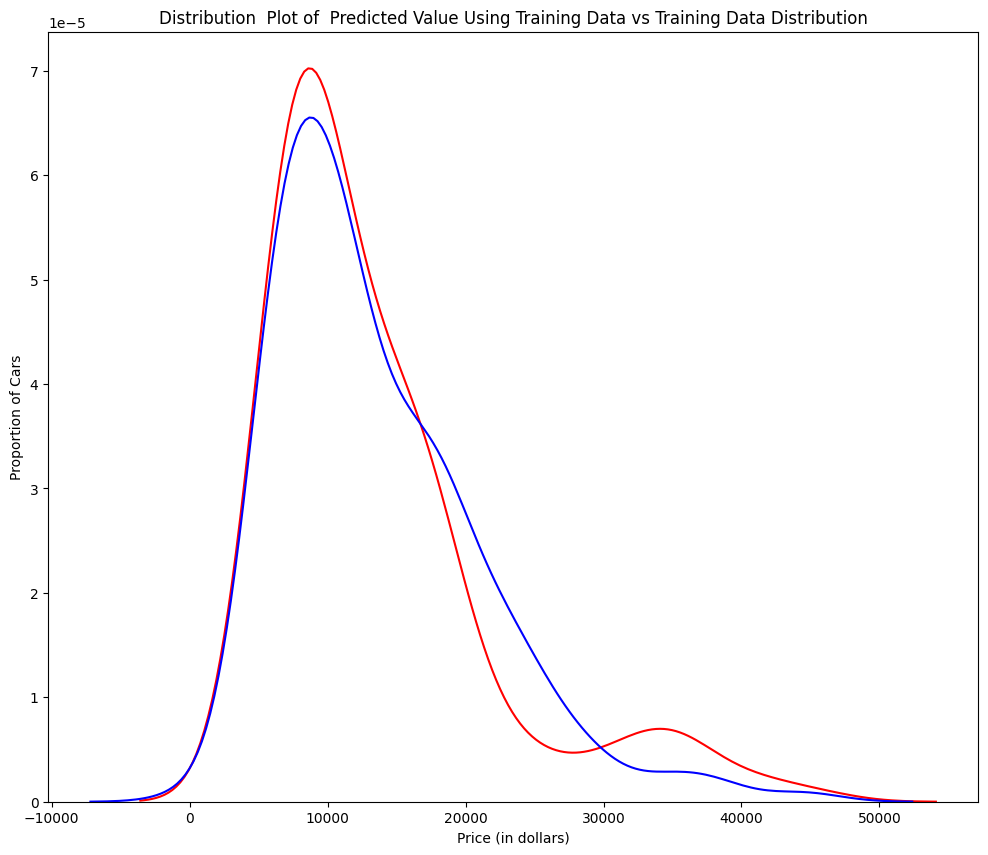

In [50]:
# Let's examine the distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)